In [2]:
# rohit smells
import matplotlib.pyplot as plt
import pandas
import folium

data = pandas.read_csv("AB_NYC_2019.csv")
data
# data[['number_of_reviews']].max()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


Text(0.5, 0, 'Rental Type')

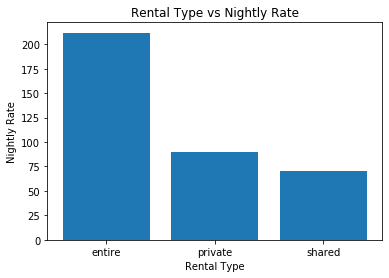

In [3]:
# Visulizations:

#3 Room Type vs Price
data_by_roomtype = data.sort_values(["room_type"])
room_types = data_by_roomtype["room_type"].unique()


sums = {"entire": 0, "private": 0, "shared": 0}
tally = {"entire": 0, "private": 0, "shared": 0}
averages = {}

def generate_bar_plot(row, sortBy):
    global sums, tally
    if(row["room_type"]=="Entire home/apt"):
        sums["entire"]+=row[sortBy]
        tally["entire"]+=1
    elif(row["room_type"]=="Private room"):
        sums["private"]+=row[sortBy]
        tally["private"]+=1
    elif(row["room_type"] == "Shared room"):
        sums["shared"]+=row[sortBy]
        tally["shared"]+=1

# data_by_roomtype.apply(generate_bar_plot, axis=1)
for index, row in data_by_roomtype.iterrows():
    generate_bar_plot(row, "price") 

for k in sums:
    averages[k] = sums[k]/tally[k]
    
plt.bar(averages.keys(), averages.values())

plt.title("Rental Type vs Nightly Rate")
plt.ylabel("Nightly Rate")
plt.xlabel("Rental Type")

In [4]:
averages

{'entire': 211.79424613325986,
 'private': 89.78097285675894,
 'shared': 70.12758620689655}

In [5]:
#5 Map based on rating

# How to group by neighborhood group and then see the data?
m = folium.Map(location=[40.49, -74.24], zoom_start=11)
df = pandas.DataFrame(data)
df = df.sample(n = 1000)

for i in range(0, len(df)):

    if df.iloc[i]['number_of_reviews'] >= 0 and df.iloc[i]['number_of_reviews'] < 100:
        c = 'darkred'
    elif df.iloc[i]['number_of_reviews'] >= 100 and df.iloc[i]['number_of_reviews'] < 200:
        c = 'black'
    elif df.iloc[i]['number_of_reviews'] >= 200 and df.iloc[i]['number_of_reviews'] < 300:
        c = 'orange'
    elif df.iloc[i]['number_of_reviews'] >= 300 and df.iloc[i]['number_of_reviews'] < 400:
        c = 'white'
    elif df.iloc[i]['number_of_reviews'] >= 400 and df.iloc[i]['number_of_reviews'] < 500:
        c = 'green'
    elif df.iloc[i]['number_of_reviews'] >= 500 and df.iloc[i]['number_of_reviews'] < 600:
        c = 'blue'
    elif df.iloc[i]['number_of_reviews'] >= 600 and df.iloc[i]['number_of_reviews'] < 700:
        c = 'purple'
        
    folium.Circle(
        radius=5,
        location=[df.iloc[i]['latitude'], df.iloc[i]['longitude']],
        popup= df.iloc[i]['neighbourhood_group'],
        color=c,
        fill=False,
    ).add_to(m)
    
m

# The ones with better reviews tend to be in Queens 

Text(0.5, 0, 'Rental Type')

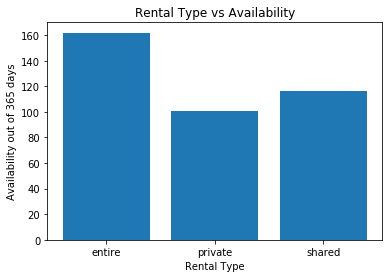

In [6]:
#6 Room_type vs availability

for index, row in data_by_roomtype.iterrows():
    generate_bar_plot(row, "availability_365") 

for k in sums:
    averages[k] = sums[k]/tally[k]
    
plt.bar(averages.keys(), averages.values())
plt.title("Rental Type vs Availability")
plt.ylabel("Availability out of 365 days")
plt.xlabel("Rental Type")

# Overall, it is apparent that entire homes/apts are more available in NYC 

In [ ]:
averages